In [1]:
import sys
sys.path.append('../../')

In [28]:
from DiffRed import DiffRed as dr 
from DiffRed.utils import stress
import numpy as np
from tensorflow.keras.datasets.fashion_mnist import load_data
from tqdm import tqdm

In [3]:
(x_train,y_train), (x_test,y_test)=load_data()

In [4]:
x_train=x_train.reshape((60000,784))

In [6]:
del x_test, y_test

In [34]:
sample_sizes=list(range(10,10000,100))

In [24]:
stress_list=[]

In [25]:
k1=5
k2=15

In [35]:
for sample in tqdm(sample_sizes,desc='Loading...'):
    A=x_train[:sample]
    DiffRed=dr(k1,k2,opt_metric='m1')
    Z=DiffRed.fit_transform(A)
    stress_list.append(stress(A,Z))

Loading...:  11%|█         | 11/100 [00:40<05:25,  3.65s/it]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

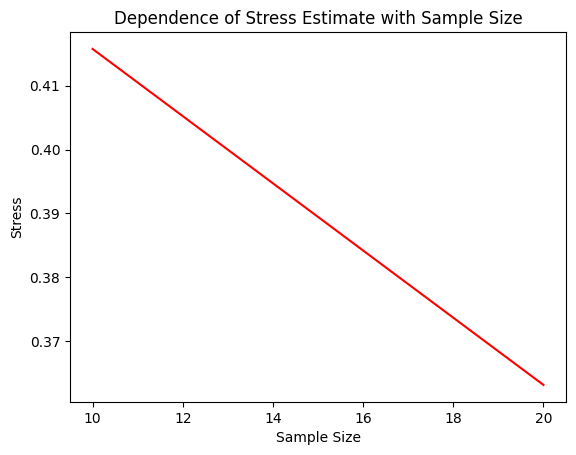

In [ ]:
plt.plot(sample_sizes,stress_list,color='red')
plt.title('Dependence of Stress Estimate with Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Stress')
plt.savefig('./results/stress_vs_sample.png')
plt.show()